In [43]:
import numpy as np
import random
import matplotlib.pyplot as plt

In [44]:
def stream_samp(samps: dict, order: int, L: int):
    if len(samps[order]) > L:
        hi_ord = order+1
        if hi_ord not in samps:
            samps[hi_ord] = []
        samp1 = samps[order].pop(0)
        samp2 = samps[order].pop(0)
        re_samp = random.sample(samp1, int(len(samp1)/2))
        re_samp += random.sample(samp2, int(len(samp2)/2))
        samps[hi_ord].append(re_samp)
        samps = stream_samp(samps, hi_ord, L)
    return samps

In [45]:
stream_lim = 10000
values = [i+1 for i in range(stream_lim)]

In [46]:
stream = True
alpha = 0.15
L = 5
T = 10

samps = {0:[[]]}

i = 0

while stream:
    if np.random.rand() < alpha:
        samps[0][-1].append(values[i])
        if len(samps[0][-1]) > T:
            samps[0].append([])
            samps[0][-1].append(samps[0][-2].pop())
            samps = stream_samp(samps, 0, L)
    i+=1
    if i == stream_lim:
        stream = False

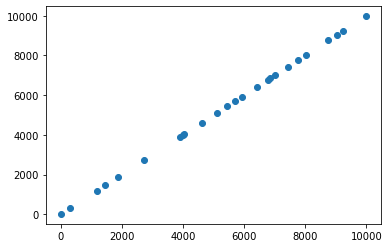

In [47]:
samp_list = []

prob_dist = []

for k,v in samps.items():
    for i in range(len(samps[k])):
        samp_list += samps[k][i]
        prob_dist += [2**k]*len(samps[k][i])
            
prob_dist = [i/sum(prob_dist) for i in prob_dist]

fin_res = np.random.choice(samp_list, size=25, replace=False,p=prob_dist)
_ = plt.scatter(fin_res,fin_res)